Observations from the data:
NOTE: Observations are based on a Twitter pull for the five outlets made at 11:20 PM on 05/23/2020.

1. Fox News had a vader sentiment that was almost uniformly 0, indicating a very neutral sentiment in tweet contents.  Further exploration revealed that the Fox News twitter was posting hyperlinks to articles in the twitter body instead of actual text.  Since vader sentiment cannot interpret the hyperlink as either positive or negative (it's not a word the program can analyze), it is returning the tweet as having very neutral sentiment.  One could conduct an analysis on the actual articles to gain a better understanding of the sentiment of the tweets.

2. Overall, BBC had the most positive vader sentiment compound value of all news outlets.  Upon looking at the most recent tweets, it is apparent that BBC is launching a mental health campaign, offering several tips and resources on how to stay positive during quarantine (as well as declaring "Finding Dory" as a "perfect" weekend movie.  Their more optimistic/supportive outlook on their tweets supports its compound score of approximately 0.30.

3. Overall, the New York Times had the most negative vader sentiment compound value of all news outlets.  Upon looking at the most recent tweets, it can be seen that the New York Times has been posting very frequently about COVID-19, and there aren't many good things to share regarding that topic, unfortunately.  Although there are some uplifting articles and tweets, they are usually included with words such as "despite," "changed," "quieted," and "empty," which can all reduce the sentiment of an otherwise positive post, and allowing the outright negative tweets to dominate the overall sentiment.

In [1]:
#!pip install vaderSentiment
# Import Dependencies
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import os
import json
import tweepy
import pandas as pd
import matplotlib.pyplot as plt
import time
analyzer = SentimentIntensityAnalyzer()

In [2]:
# Get the current working directory
orig_working_directory = os.getcwd()
print(orig_working_directory)

# In this case, we are changing it to six levels up
os.chdir(os.path.join('..'))

# Now, you can see the new working directory
curr_working_directory = os.getcwd()
os.getcwd()

C:\Users\Chris\06_API_Challenge_CJM\01_Twitter_API_CJM


'C:\\Users\\Chris\\06_API_Challenge_CJM'

In [3]:
# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [4]:
# Target Search Term
target_terms = ["BBC", "CBSNews", "CNN", "FoxNews", "nytimes"]

# List to hold sentiment
tweets = []
name = []
created_at = []
full_text = []

# Loop through all target users
for target in target_terms:
    tweets = tweepy.Cursor(api.user_timeline, target, tweet_mode='extended').items(100)
    for n in tweets:
        name.append(n.author.name)
        created_at.append(n.created_at)
        full_text.append(n.full_text)

In [5]:
tweets_df = pd.DataFrame({"Name": name, "Created": created_at, "Text": full_text})
tweets_df.head(20)

,Name,Created,Text
0,BBC,2020-05-23 16:01:00,#FindingDory = perfect weekend film! 🙌🐠\n\n6...
1,BBC,2020-05-23 15:01:00,We hope this brings you some much needed tranq...
2,BBC,2020-05-23 13:01:00,"""If any good can come of me sharing my experie..."
3,BBC,2020-05-23 12:47:16,RT @BBCTheOneShow: In support of #MentalHealth...
4,BBC,2020-05-23 12:01:00,Israeli investors develop face mask with remot...
5,BBC,2020-05-23 11:01:00,"The Duke of Cambridge, Gareth Southgate and th..."
6,BBC,2020-05-23 09:28:00,Who haven't we heard from yet on Coronavirus? ...
7,BBC,2020-05-22 19:01:00,Tonight chatting to #GrahamNorton...\n\n✨ @kat...
8,BBC,2020-05-22 19:01:00,Piglet rescue! 😭❤️\n\nRoaming In The Wild is s...
9,BBC,2020-05-22 16:01:00,Here is @matthaig1's simple piece of advice fo...


In [6]:
news_outlet = tweets_df.loc[0, 'Name']
num = 0
for i , row in tweets_df.iterrows():
    if row['Name'] == news_outlet:
        tweets_df.loc[i, 'Tweets Ago'] = num
        num += 1
    else:
        num = 0
        tweets_df.loc[i, 'Tweets Ago'] = num
        news_outlet = row['Name']
        num += 1

In [7]:
for i, row in tweets_df.iterrows():
    tweet = row["Text"]
    vader = analyzer.polarity_scores(f'{tweet}')
    tweets_df.loc[i,'Comp'] = vader['compound']
    tweets_df.loc[i,'Positive'] = vader['pos']
    tweets_df.loc[i,'Neutral'] = vader['neu']
    tweets_df.loc[i,'Negative'] = vader['neg']

In [8]:
tweets_df

,Name,Created,Text,Tweets Ago,Comp,Positive,Neutral,Negative
0,BBC,2020-05-23 16:01:00,#FindingDory = perfect weekend film! 🙌🐠\n\n6...,0.0,0.6114,0.174,0.826,0.000
1,BBC,2020-05-23 15:01:00,We hope this brings you some much needed tranq...,1.0,0.8074,0.249,0.751,0.000
2,BBC,2020-05-23 13:01:00,"""If any good can come of me sharing my experie...",2.0,0.7184,0.245,0.660,0.096
3,BBC,2020-05-23 12:47:16,RT @BBCTheOneShow: In support of #MentalHealth...,3.0,0.4019,0.172,0.828,0.000
4,BBC,2020-05-23 12:01:00,Israeli investors develop face mask with remot...,4.0,0.0000,0.000,1.000,0.000
...,...,...,...,...,...,...,...,...
495,The New York Times,2020-05-22 19:50:04,"For decades, the backbone of the U.S.'s disast...",95.0,-0.9274,0.048,0.625,0.327
496,The New York Times,2020-05-22 19:19:02,Planning your menu this Memorial Day weekend? ...,96.0,0.5719,0.144,0.856,0.000
497,The New York Times,2020-05-22 19:07:23,Breaking News: President Trump called houses o...,97.0,-0.0531,0.089,0.772,0.138
498,The New York Times,2020-05-22 19:00:09,Hungary has moved nearly 300 asylum seekers ou...,98.0,-0.3612,0.000,0.930,0.070


In [9]:
bbc = tweets_df['Name'] == 'BBC'
cnn = tweets_df['Name'] == 'CNN'
cbs = tweets_df['Name'] == 'CBS News'
fox = tweets_df['Name'] == 'Fox News'
nyt = tweets_df['Name'] == 'The New York Times'

bbc_df = tweets_df.loc[bbc]['Comp']
cnn_df = tweets_df.loc[cnn]['Comp']
cbs_df = tweets_df.loc[cbs]['Comp']
fox_df = tweets_df.loc[fox]['Comp']
nyt_df = tweets_df.loc[nyt]['Comp']

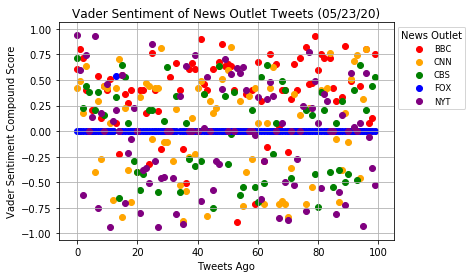

In [10]:
ago = tweets_df.iloc[0:100,3]
plt.scatter(ago, bbc_df, color = 'r', label = 'BBC')
plt.scatter(ago, cnn_df, color = 'orange', label = 'CNN')
plt.scatter(ago, cbs_df, color = 'g', label = 'CBS')
plt.scatter(ago, fox_df, color = 'b', label = 'FOX')
plt.scatter(ago, nyt_df, color = 'purple', label = 'NYT')
plt.title('Vader Sentiment of News Outlet Tweets (%s)' % time.strftime('%x'))
plt.xlabel('Tweets Ago')
plt.ylabel('Vader Sentiment Compound Score')
lgnd = plt.legend(fontsize="small", mode="Expanded", 
                  numpoints=1, scatterpoints=1, 
                  loc="upper left", bbox_to_anchor=(1,1), title="News Outlet", 
                  labelspacing=0.5)
plt.grid(True)

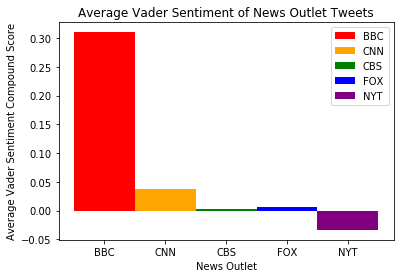

In [13]:
bbc_avg = tweets_df.loc[bbc]['Comp'].mean()
cnn_avg = tweets_df.loc[cnn]['Comp'].mean()
cbs_avg = tweets_df.loc[cbs]['Comp'].mean()
fox_avg = tweets_df.loc[fox]['Comp'].mean()
nyt_avg = tweets_df.loc[nyt]['Comp'].mean()
plt.bar('BBC',bbc_avg, color = 'r', width = 1.0, label = 'BBC')
plt.bar('CNN',cnn_avg, color = 'orange', width = 1.0, label = 'CNN')
plt.bar('CBS',cbs_avg, color = 'g', width = 1.0, label = 'CBS')
plt.bar('FOX',fox_avg, color = 'b', width = 1.0, label = 'FOX')
plt.bar('NYT',nyt_avg, color = 'purple', width = 1.0, label = 'NYT')
plt.title('Average Vader Sentiment of News Outlet Tweets')
plt.xlabel('News Outlet')
plt.ylabel('Average Vader Sentiment Compound Score')
plt.legend()

In [12]:
vader_avgs = pd.Series({'BBC': bbc_avg, 'CNN': cnn_avg, 'CBS': cbs_avg, 'FOX': fox_avg, 'NYT': nyt_avg})
vader_avgs

BBC    0.310002
CNN    0.037646
CBS    0.002115
FOX    0.005423
NYT   -0.033643
dtype: float64